In [150]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [151]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [152]:
number_of_classes = np.max(train_labels)+1
print(number_of_classes)

10


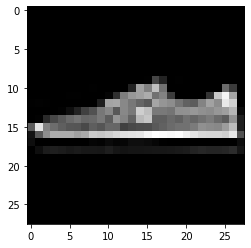

In [153]:
import matplotlib.pyplot as plt
for index in range(10, 15):
  plt.imshow(train_images[index], cmap='gray')

In [154]:
lbl_train= keras.utils.to_categorical(train_labels, num_classes= number_of_classes)
lbl_test= keras.utils.to_categorical(test_labels, num_classes= number_of_classes)

In [155]:
img_train = train_images/255
img_test = test_images/255
img_train = [image.reshape(28*28) for image in img_train]
img_test = [image.reshape(28*28) for image in img_test]
img_train= np.array(img_train)
img_test= np.array(img_test)

In [180]:
model = Sequential()
model.add(Dense(100,activation='relu',input_dim=28*28))
model.add(Dense(70,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes,activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 100)               78500     
                                                                 
 dense_86 (Dense)            (None, 70)                7070      
                                                                 
 dropout_24 (Dropout)        (None, 70)                0         
                                                                 
 dense_87 (Dense)            (None, 100)               7100      
                                                                 
 dropout_25 (Dropout)        (None, 100)               0         
                                                                 
 dense_88 (Dense)            (None, 10)                1010      
                                                                 
Total params: 93,680
Trainable params: 93,680
Non-tra

In [181]:
optimizer = keras.optimizers.Adam(0.001)
model.compile(optimizer , loss='categorical_crossentropy', metrics=['accuracy'])

In [182]:
h = model.fit(img_train, lbl_train, batch_size= 64, epochs=200 ,validation_split=0.2)

Epoch 1/200
750/750 [==============================] - 4s 5ms/step - loss: 0.8388 - accuracy: 0.7022 - val_loss: 0.4739 - val_accuracy: 0.8290
Epoch 2/200
750/750 [==============================] - 3s 4ms/step - loss: 0.5307 - accuracy: 0.8188 - val_loss: 0.4484 - val_accuracy: 0.8307
Epoch 3/200
750/750 [==============================] - 3s 4ms/step - loss: 0.4730 - accuracy: 0.8389 - val_loss: 0.3864 - val_accuracy: 0.8588
Epoch 4/200
750/750 [==============================] - 3s 4ms/step - loss: 0.4304 - accuracy: 0.8519 - val_loss: 0.3694 - val_accuracy: 0.8642
Epoch 5/200
750/750 [==============================] - 3s 4ms/step - loss: 0.4123 - accuracy: 0.8577 - val_loss: 0.3691 - val_accuracy: 0.8663
Epoch 6/200
750/750 [==============================] - 3s 4ms/step - loss: 0.3946 - accuracy: 0.8621 - val_loss: 0.3565 - val_accuracy: 0.8731
Epoch 7/200
750/750 [==============================] - 3s 4ms/step - loss: 0.3765 - accuracy: 0.8701 - val_loss: 0.3560 - val_accuracy: 0.8729

In [183]:
model.evaluate(img_test,lbl_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.8789


[0.6925557851791382, 0.8788999915122986]

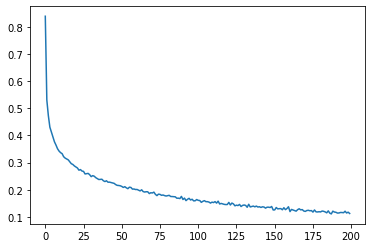

In [184]:
plt.plot(h.history['loss'])

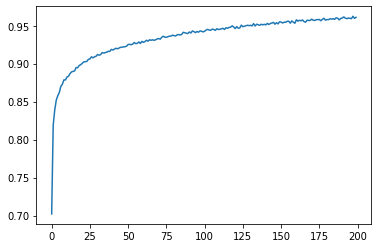

In [185]:
plt.plot(h.history['accuracy'])